<a href="https://colab.research.google.com/github/5H1V1M/CodeAlpha_Tasks/blob/main/Car_Price_Prediction(Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydotplus

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pydotplus
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"/content/car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
print(df['Selling_type'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Transmission'].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [13]:
df['Selling_type'] = df['Selling_type'].map({'Dealer':0,'Individual':1})
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [16]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [17]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2, random_state =42)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<Axes: xlabel='Fuel_Type'>

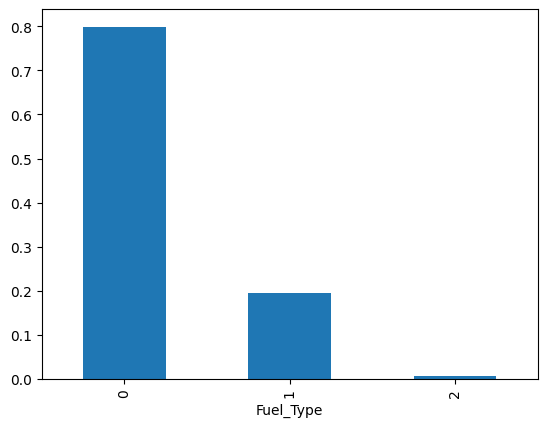

In [20]:
df['Fuel_Type'].value_counts(normalize = True).plot(kind = 'bar')

#0 represents Petrol, 1 represents Diesel and 2 represents CNG

<Axes: ylabel='proportion'>

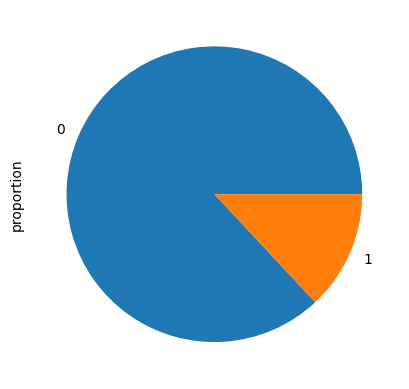

In [21]:
df['Transmission'].value_counts(normalize = True).plot(kind = 'pie')

#0 represents Manual and 1 represents Automatic

<Axes: ylabel='proportion'>

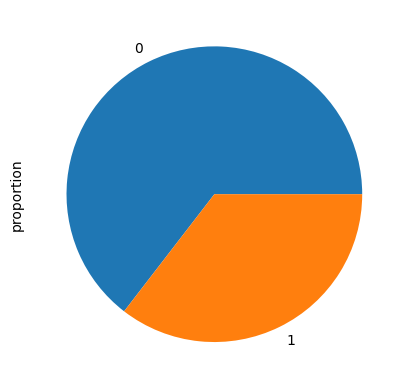

In [22]:
df['Selling_type'].value_counts(normalize = True).plot(kind = 'pie')

#0 represents Dealer and 1 represents Individual

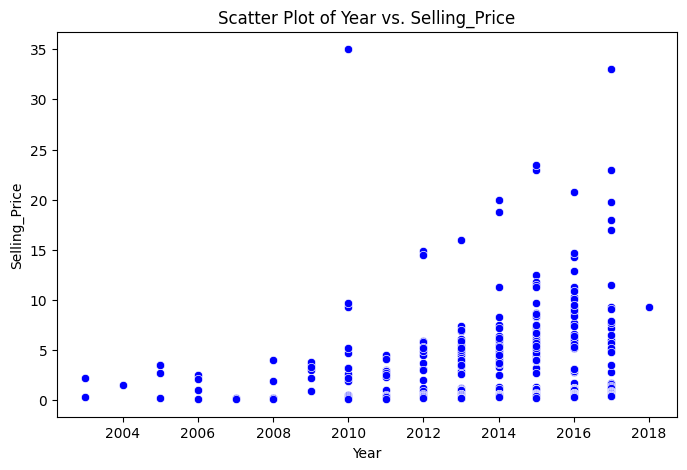

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Year'], y = df['Selling_Price'], color='blue')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.title('Scatter Plot of Year vs. Selling_Price')

plt.show()


In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred

array([ 7.88119563,  7.29321007,  1.40695742,  6.41030494, 11.3576468 ,
        4.31336423,  9.55294999,  1.80594872,  8.32982719, -0.9418274 ,
       11.24296694, -0.71112949, -0.37417432,  1.44136638,  4.79859366,
        4.89120514,  1.26432879,  2.00030281, 22.5565373 ,  0.86557922,
        0.95825301,  2.86258949,  5.46802175,  0.17572205,  5.62172946,
        8.39827881,  8.59413521,  1.25538061,  5.08632435,  4.98045462,
        5.30977989,  5.30140462,  5.63377706,  2.66374431,  2.45540779,
        6.37935165,  1.38666847, -8.29119234,  1.34521045, 10.65737055,
        7.67738901,  8.95288109,  1.72144199,  3.19023443,  1.02457753,
       -1.78288912,  8.65151999,  4.24890592,  4.15533177, -0.59415504,
        0.78592018,  0.3542756 , 11.30206149,  9.32812045,  7.84791002,
        5.52115119,  3.68039022,  3.13478215,  9.59248123, 10.31419798,
        5.45677266, -0.56501272,  0.10532587, -0.66204892,  2.08098556,
        2.24016044,  8.23617153,  9.32058466,  2.56815794,  4.89

In [26]:
y_test

,Selling_Price
283,8.99
267,8.35
166,0.45
9,7.45
78,5.25
...,...
96,20.75
264,4.00
229,3.10
274,5.30


In [27]:
model_r2_score = r2_score(y_test, y_pred)
model_mse = mean_squared_error(y_test, y_pred)
model_rmse = mean_squared_error(y_test, y_pred)
model_mae = mean_absolute_error(y_test, y_pred)

In [28]:
print(f"The r2_score using Linear Regression : {model_r2_score:.2f}")
print(f"The MSE using Linear Regression : {model_mse:.2f}")
print(f"The RMSE using Linear Regression : {model_rmse:.2f}")
print(f"The MAE Error using Linear Regression : {model_mae:.2f}")

The r2_score using Linear Regression : 0.82
The MSE using Linear Regression : 4.42
The RMSE using Linear Regression : 4.42
The MAE Error using Linear Regression : 1.18


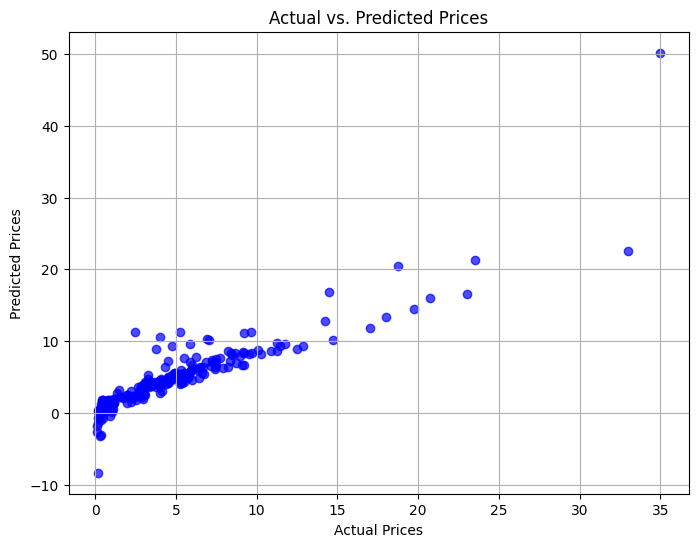

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

In [30]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred = dtr.predict(x_test)

In [32]:
dtr_r2_score = r2_score(y_test, y_pred)
dtr_mse = mean_squared_error(y_test, y_pred)
dtr_rmse = mean_squared_error(y_test, y_pred)
dtr_mae = mean_absolute_error(y_test, y_pred)

In [33]:
print(f"The r2_score using Decision Tree Regressor : {dtr_r2_score:.2f}")
print(f"The MSE using Decision Tree Regressor : {dtr_mse:.2f}")
print(f"The RMSE using Decision Tree Regressor : {dtr_rmse:.2f}")
print(f"The MAE Error using Decision Tree Regressor : {dtr_mae:.2f}")

The r2_score using Decision Tree Regressor : 0.81
The MSE using Decision Tree Regressor : 4.79
The RMSE using Decision Tree Regressor : 4.79
The MAE Error using Decision Tree Regressor : 1.01


In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf.predict(x_test)

In [36]:
rf_r2_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

In [37]:
print(f"The r2_score using Random Forest Regressor : {rf_r2_score:.2f}")
print(f"The MSE using Random Forest Regressor : {rf_mse:.2f}")
print(f"The RMSE using Random Forest Regressor : {rf_rmse:.2f}")
print(f"The MAE Error using Random Forest Regressor : {rf_mae:.2f}")

The r2_score using Random Forest Regressor : 0.83
The MSE using Random Forest Regressor : 4.36
The RMSE using Random Forest Regressor : 4.36
The MAE Error using Random Forest Regressor : 0.96


In [38]:
svr = SVR(kernel='linear', C=1)
svr.fit(x_train, y_train)

SVR(C=1, kernel='linear')

In [39]:
svr_r2_score = r2_score(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)

In [40]:
print(f"The r2_score using Support Vector Machine: {svr_r2_score:.2f}")
print(f"The MSE using Support Vector Machine: {svr_mse:.2f}")
print(f"The RMSE using Support Vector Machine: {svr_rmse:.2f}")
print(f"The MAE Error using Support Vector Machine : {svr_mae:.2f}")

The r2_score using Support Vector Machine: 0.83
The MSE using Support Vector Machine: 4.36
The RMSE using Support Vector Machine: 4.36
The MAE Error using Support Vector Machine : 0.96


In [44]:
metric_results = {'Model': ['Linear Regression','Decision Tree','Random Forest','Support Vector Machine'],
                 'R2 Square': [model_r2_score, dtr_r2_score, rf_r2_score, svr_r2_score],
                  'MSE':[model_mse, dtr_mse, rf_mse, svr_mse],
                  'RMSE':[model_rmse, dtr_rmse, rf_rmse, svr_rmse],
                  'MAE':[model_mae, dtr_mae, rf_mae, svr_mae]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R2 Square,MSE,RMSE,MAE
0,Linear Regression,0.823935,4.421199,4.421199,1.178374
1,Decision Tree,0.809382,4.786650,4.786650,1.008667
2,Random Forest,0.826336,4.360898,4.360898,0.962391
3,Support Vector Machine,0.826336,4.360898,4.360898,0.962391
